# 1. Lý thuyết

**1) Để khởi tạo model trong pytorch chúng ta sử dụng class nào?**

A. nn.Module

B. nn.Dense

C. nn.optim.Adam

D. nn.Dropout

**2) Để khởi tạo mạng neural network trong pytorch chúng ta cần làm gì ?**

A. Kế thừa lại class `nn.Model`. Khởi tạo các layers trong hàm tạo `__init__()` và sử dụng các layers để tính toán dữ liệu trong hàm `forward()`.

B. Khởi tạo một object của class `nn.Model` và sử dụng hàm `add()` để thêm từng layer vào mô hình.

C. Sử dụng class `nn.Model` để khởi tạo mô hình. Truyền vào bên trong class này một list gồm các layers.

D. Kế thừa lại class `nn.Module`. Khởi tạo các layers trong hàm tạo `__init__()` và sử dụng các layers để tính toán dữ liệu trong hàm `forward()`.


**3) Các modules chính trong pytorch dùng để xây dựng và huấn luyện model.**

A. `torch.nn`: Dùng để khởi tạo các layers và activations function và loss function, `torch.optim`: Khởi tạo optimizer, `torch.data`: Khởi tạo dataset và dataloader.

B. `torch.nn`: Dùng để khởi tạo các layers và activations function và loss function, `torch.optim`: Khởi tạo optimizer, `torch.utils.data`: Khởi tạo dataset và dataloader.

C. `torch.nn`: Dùng để khởi tạo các layers và activations function, `torch.optim`: Khởi tạo optimizer, `torch.data`: Khởi tạo dataset và dataloader, `torch.loss`: Khởi tạo loss function.

D. `torch.nn`: Dùng để khởi tạo các layers và loss function, `torch.optim`: Khởi tạo optimizer, `torch.data`: Khởi tạo dataset và dataloader, `torch.activations`: Khởi tạo activations function.


**4) Để customize một Dataset trên pytorch chúng ta cần thực hiện như thế nào?**

A. Sử dụng thuộc tính `transformer` để qui định các biến đổi trên dữ liệu. Những biến đổi này được thực hiện trên hàm tạo.

B. Khởi tạo một class kế thừa lại `torch.utils.data.Dataset`. Khai báo các thuộc tính cần sử dụng trong hàm tạo của dataset như list đường dẫn, list label. Override lại hàm `__getitem__()` để thực hiện các xử lý trên dữ liệu.

C. Kế thừa lại một class `Dataset`. Các điều chỉnh trên dữ liệu được thực hiện trên hàm `transformer()`.

D. Sử dụng hàm `__getitem__()` để trả về toàn bộ các quan sát khi huấn luyện. 

**5) Ý nghĩa của tham số epochs và batch_size trong huấn luyện mô hình là gì?**

A. epochs là kích thước của một mini-batch, batch_size là số lượt lặp lại toàn bộ dữ liệu khi huấn luyện.

B. epochs là số lượt lặp lại toàn bộ dữ liệu validation khi huấn luyện, batch_size là kích thước của một mini-batch.

C. epochs là số lượt lặp lại toàn bộ dữ liệu train khi huấn luyện, batch_size là kích thước của một mini-batch.

D. epochs là số lượng vòng lặp, mỗi vòng lặp là một lượt fit mini-batch, trên bộ dữ liệu khi huấn luyện; batch_size là kích thước của một mini-batch.

# 2. Thực hành

6) Khởi tạo một tensor 3 chiều với định dạng là float và kích thước là 32x32x3

7) Nếu coi tensor trên là một bức ảnh RGB với số channel là 3 ở cuối. Hãy truy suất các ma trận ảnh tương ứng với mỗi kênh R, G, B.

8) Thực hiện tích hadamard và tích thông thường giữa ma trận R và G.

9) Từ bộ dữ liệu [Income-Classification](https://www.kaggle.com/t/090688c8d33a40b68be9e271d6ba6bae) hãy chuẩn hóa dữ liệu và phân chia tập train/test theo tỷ lệ 80/20. 

10) Xây dựng một mạng deep-neural-network để huấn luyện mô hình trên dữ liệu train và đánh giá mô hình trên dữ liệu test.


# 1. Lý thuyết
1) A
2) D
3) B
4) B
5) C

# 2. Thực hành

In [ ]:
from google.colab import drive
import os

drive.mount("/content/gdrive")
os.chdir("gdrive/MyDrive/Colab Notebooks/KhanhML")
print(os.getcwd())

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks/KhanhML


In [ ]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.utils.data as td

In [ ]:
# 6
torch_obj = torch.tensor(np.arange(0, 3072).reshape(32,32,3))
print(torch_obj.shape)

torch.Size([32, 32, 3])


In [ ]:
#7 
R = torch_obj[:,:,0]
G = torch_obj[:,:,1]
B = torch_obj[:,:,2]

In [ ]:
#8 
hadamard = torch.mul(R, G)
print(hadamard.shape)
hadamard

torch.Size([32, 32])


tensor([[      0,      12,      42,  ...,    7656,    8190,    8742],
        [   9312,    9900,   10506,  ...,   33672,   34782,   35910],
        [  37056,   38220,   39402,  ...,   78120,   79806,   81510],
        ...,
        [7753440, 7770156, 7786890,  ..., 8245512, 8262750, 8280006],
        [8297280, 8314572, 8331882,  ..., 8806056, 8823870, 8841702],
        [8859552, 8877420, 8895306,  ..., 9385032, 9403422, 9421830]])

In [ ]:
#9
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

train  = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/KhanhML/train_income.csv")

def one_hot_categorical_features(df, cat_features):
    df_new=pd.get_dummies(df, columns=cat_features)
    return df_new

def preprocess_data(data, continuous_feat, categorical_feat, income_feat):
    scaler=StandardScaler()
    data = data[continuous_feat+categorical_feat+income_feat]
    for col in data.columns:
        data[col].replace("?", np.nan, inplace=True)
        
        if col in continuous_feat:
            data[col] = scaler.fit_transform(np.array(data[col]).reshape(-1,1))      
    return data

In [ ]:
## Process
categorical_feat = ['work_type','education','marital_state','job','status','ethnicity','sex','nationality']
continuous_feat = ['age','final_weight','total_education_yrs','capital_gain','capital_loss','hrs_per_week']

train_process = preprocess_data(train.iloc[:,1:],continuous_feat,categorical_feat,['target_income'])
train_process = one_hot_categorical_features(train_process,categorical_feat)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
label = 'target_income'
features = [i for i in train_process.columns if 'target_income' not in i]
x_train, x_test, y_train, y_test = train_test_split(train_process[features].values, # input variable
                                                    train_process[label].values, # output variable
                                                    test_size=0.20, # test dataset proportion
                                                    stratify=train_process['target_income'], # assign equal proportion of target label in train/test 
                                                    random_state=0) # keep train/test split the same if run again. 

In [ ]:
#10
torch.manual_seed(0)

# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=20,
    shuffle=True, num_workers=1)

# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=20,
    shuffle=False, num_workers=1)
print('Ready to load data')

Ready to load data


In [ ]:
features = [i for i in train_process.columns if 'target_income' not in i]
label = ['target_income']

In [ ]:
hl = 10
class Income(nn.Module):
    def __init__(self):
        super(Income, self).__init__()
        self.fc1 = nn.Linear(len(features), hl)
        self.fc2 = nn.Sigmoid()
        self.fc3 = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Create a model instance from the network
model = Income()
print(model)

Income(
  (fc1): Linear(in_features=105, out_features=10, bias=True)
  (fc2): Sigmoid()
  (fc3): Sigmoid()
)


In [ ]:
def train(model, data_loader, optimizer):
    # Set the model to training mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        #feedforward: calculate y_pred and loss function
        optimizer.zero_grad()
        out = model(data)
        loss = loss_criteria(out, target)
        train_loss += loss.item()

        # backpropagate: compute gradient descent and update weights
        loss.backward()
        optimizer.step()

    #Return average loss
    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
           
            
def test(model, data_loader):
    # Switch the model to evaluation mode (so we don't backpropagate)
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()

            # Calculate the accuracy
            _, predicted = torch.max(out.data, 1)
            correct += torch.sum(target==predicted).item()
            
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss

# Specify the loss criteria (we'll use CrossEntropyLoss for multi-class classification)
loss_criteria = nn.CrossEntropyLoss()

# (see https://pytorch.org/docs/stable/optim.html#algorithms for details of supported algorithms)
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 50 epochs
epochs = 50
for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)


Epoch: 1
Training set: Average loss: 2.299074
Validation set: Average loss: 2.298254, Accuracy: 4158/5000 (83%)

Epoch: 2
Training set: Average loss: 2.298171
Validation set: Average loss: 2.298117, Accuracy: 4149/5000 (83%)

Epoch: 3
Training set: Average loss: 2.298096
Validation set: Average loss: 2.298076, Accuracy: 4146/5000 (83%)

Epoch: 4
Training set: Average loss: 2.298068
Validation set: Average loss: 2.298058, Accuracy: 4143/5000 (83%)

Epoch: 5
Training set: Average loss: 2.298054
Validation set: Average loss: 2.298048, Accuracy: 4122/5000 (82%)

Epoch: 6
Training set: Average loss: 2.298045
Validation set: Average loss: 2.298041, Accuracy: 4116/5000 (82%)

Epoch: 7
Training set: Average loss: 2.298040
Validation set: Average loss: 2.298036, Accuracy: 4095/5000 (82%)

Epoch: 8
Training set: Average loss: 2.298036
Validation set: Average loss: 2.298033, Accuracy: 4089/5000 (82%)

Epoch: 9
Training set: Average loss: 2.298033
Validation set: Average loss: 2.298031, Accuracy: 

Text(0, 0.5, 'Actual Species')

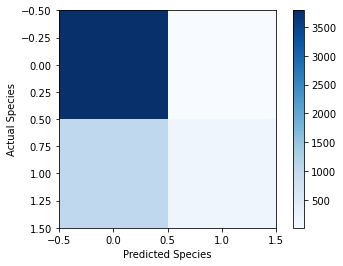

In [ ]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
from matplotlib import pyplot as plt

# Set the model to evaluate mode
model.eval()

# Get predictions for the test data
x = torch.Tensor(x_test).float()
_, predicted = torch.max(model(x).data, 1)

# Plot the confusion matrix
cm = confusion_matrix(y_test, predicted.numpy())
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
# tick_marks = np.arange(len(label))
# plt.xticks(tick_marks, label, rotation=45)
# plt.yticks(tick_marks, label)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
# plt.show()

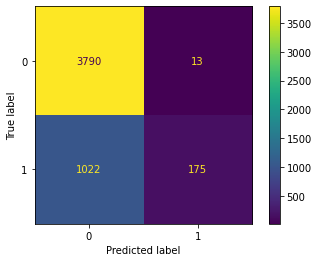

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
test_y.sum()

tensor(1197)